In [1]:
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the files
Read the two data files with the option header = None as the files did not have the headers.
Add the column name for bothe the files and combine two files to get the overall file

It has been observered that the values of the data set have been separated by ", ". So provide the delimiter as this while reading the file

Also there is an extra row in the adult.test file. So, read the data from the 2nd row

Also it has been observed that the salary class (target variable) is not same in the adult.data and adult.test sets. There is an extra dor (.) in the adult.test data set. So remove the dot to have the target classes same in the data sets

In [3]:
col_names = 'age work-class fnlwgt education education-num marital-status occupation relationship race sex capital-gain capital-loss hours-per-week native-country sal-class'.split()
data1 = pd.read_csv("adult.data", names = col_names, delimiter = ', ')
data2 = pd.read_csv("adult.test", skiprows = 1, names = col_names, delimiter = ', ')

# Read data with a delimeter ", " (comma and space) as there is a leading space before all the attribute values
# For adult.test, there is one extra line in the first line. So I skipped one row while readig
# Salary class in both data sets is not exactly same.
# So replace the sal-class column values '<=50K.' with '<=50K' and '>50K.' with '>50K'

data2['sal-class'] = data2['sal-class'].replace('<=50K.', '<=50K')
data2['sal-class'] = data2['sal-class'].replace('>50K.', '>50K')

data1.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data2.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal-class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


##### Concatenate the two data sets

In [5]:
adult_df = data1.append(data2)
adult_df_bkp = adult_df.copy()    ### Taking backup of the original whole data
adult_df_raw = adult_df.copy()    ### Taking backup of the original whole data
adult_df.info()   ### From the output, the data has no null values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
work-class        48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
sal-class         48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


##### From the below print statement, we can conclude that the two data sets are properly clubbed as the sum of individual data sets rows match with the total rows in the resulting set

In [6]:
print("Adult Train Shape:", data1.shape)
print("Adult Test Shape :", data2.shape)
print("Adult DF Shape   :", adult_df_raw.shape)


Adult Train Shape: (32561, 15)
Adult Test Shape : (16281, 15)
Adult DF Shape   : (48842, 15)


##### Further analyse the data.
Using value.counts function on all the columns, it has been observed that there are questions marks (?) in the following attributes.
work-class (2799)
occupation (2809)
native-country (857)
Numbers in brackets indicate the number of ? marks in those attributes

In [7]:
print("? marks in work class attribute    :")
print("-----------------------------------:")
print(adult_df_raw["work-class"].value_counts())
print("***********************************:")
print("\n ? marks in occupation attribute :")
print("-----------------------------------:")
print(adult_df_raw["occupation"].value_counts())
print("***********************************:")
print("\n ? marks in native country attribute:")
print("--------------------------------------:")
print(adult_df_raw["native-country"].value_counts())
print("*******************************************************")

? marks in work class attribute    :
-----------------------------------:
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: work-class, dtype: int64
***********************************:

 ? marks in occupation attribute :
-----------------------------------:
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64
***********************************:

 ? marks in native country attribute:
--------------------------------------:
United-States 

##### Univariate Analysis - Numerical Values - Boxplot

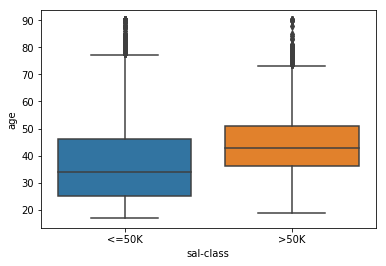

In [8]:
sns.boxplot(x = 'sal-class', y = 'age', data = adult_df_raw)

##### Age analysis
From the above plot, it's evident that more people are getting into greater than 50K category as their age increases. And this is inline with the practical situation.

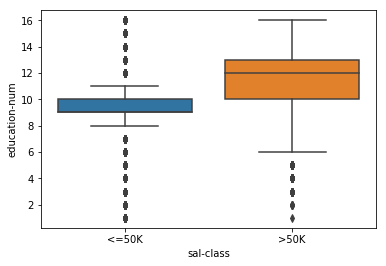

In [9]:
sns.boxplot(x = 'sal-class', y = 'education-num', data = adult_df_raw)

##### Education-num analysis
From the above plot, it's evident that the education has very positive impact on the earnings. Highly quaified people will earn higher salries and falling into greater salary brand.

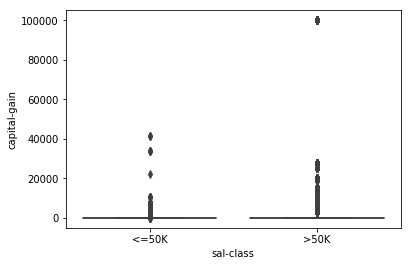

In [10]:
sns.boxplot(x = 'sal-class', y = 'capital-gain', data = adult_df_raw)

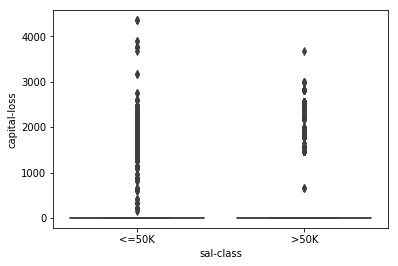

In [11]:
sns.boxplot(x = 'sal-class', y = 'capital-loss', data = adult_df_raw)

##### Capital-gain/Capital Loss analysis
Not giving any evident information on the relationship between capital gain/loss on the salary bracket

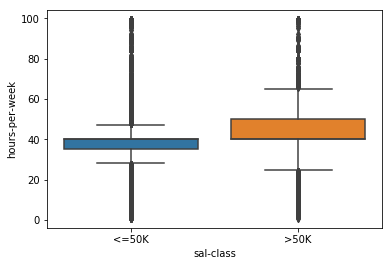

In [12]:
sns.boxplot(x = 'sal-class', y = 'hours-per-week', data = adult_df_raw)

##### Hours-per-week analysis
The hours per week clearly shows that the salary class gets into more than 50K as the number of hours go beyond 40. So it has a positive impact on movig the people to higher salary bracket

##### Univariate Analysis - Categorical Variables - countplot
Countplot analysis of categorical variables on the target variable.
I a going for count plot because the dependent variable is a binary and impact of various attributes on the outcome makes sense in terms of number of people fallinginto the category

[Text(0, 0, 'State-gov'),
 Text(0, 0, 'Self-emp-not-inc'),
 Text(0, 0, 'Private'),
 Text(0, 0, 'Federal-gov'),
 Text(0, 0, 'Local-gov'),
 Text(0, 0, '?'),
 Text(0, 0, 'Self-emp-inc'),
 Text(0, 0, 'Without-pay'),
 Text(0, 0, 'Never-worked')]

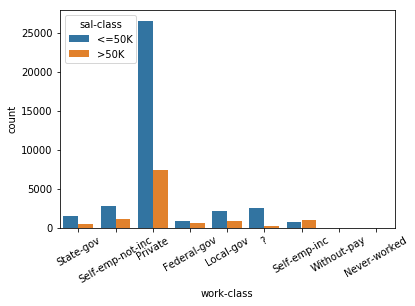

In [13]:
g = sns.countplot(adult_df_raw['work-class'], hue = adult_df_raw['sal-class'], orient = "v")
g.set_xticklabels(adult_df_raw['work-class'].unique(), rotation = 30)

##### Work class Analysis:
Fom the above plot, it is understood that the proportion of population earning above 50K is more in case of work class Self-emp-inc, federal gov. So there is an impact of the work-clss on the salary class 

[Text(0, 0, 'Bachelors'),
 Text(0, 0, 'HS-grad'),
 Text(0, 0, '11th'),
 Text(0, 0, 'Masters'),
 Text(0, 0, '9th'),
 Text(0, 0, 'Some-college'),
 Text(0, 0, 'Assoc-acdm'),
 Text(0, 0, 'Assoc-voc'),
 Text(0, 0, '7th-8th'),
 Text(0, 0, 'Doctorate'),
 Text(0, 0, 'Prof-school'),
 Text(0, 0, '5th-6th'),
 Text(0, 0, '10th'),
 Text(0, 0, '1st-4th'),
 Text(0, 0, 'Preschool'),
 Text(0, 0, '12th')]

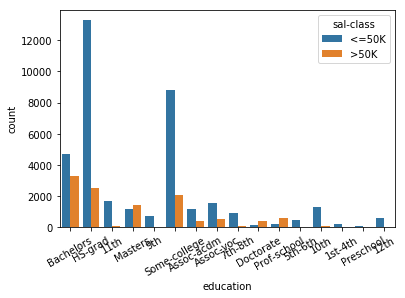

In [14]:
g = sns.countplot(adult_df_raw['education'], hue = adult_df_raw['sal-class'], orient = "v")
g.set_xticklabels(adult_df_raw['education'].unique(), rotation = 30)

##### Education Analysis:
Fom the above plot, it is evident that there are more number of people with salary >50K in the higher education group. As the education level comes down, the salary is coming to below 50K

[Text(0, 0, 'Never-married'),
 Text(0, 0, 'Married-civ-spouse'),
 Text(0, 0, 'Divorced'),
 Text(0, 0, 'Married-spouse-absent'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Married-AF-spouse'),
 Text(0, 0, 'Widowed')]

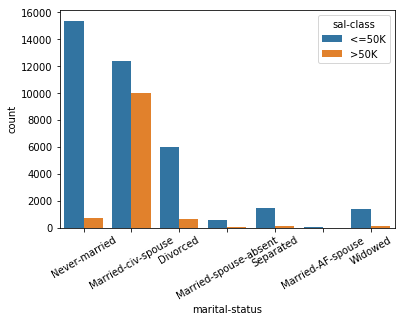

In [15]:
g = sns.countplot(adult_df_raw['marital-status'], hue = adult_df_raw['sal-class'], orient = "v")
g.set_xticklabels(adult_df_raw['marital-status'].unique(), rotation = 30)

##### Marital Status Analysis:
Fom the above plot, it is evident that other than Married-civ-spouse, every other category is earning mostly salaries less than 50K where as good number of people in Married-civ-spouse are earning more than 50K

[Text(0, 0, 'Adm-clerical'),
 Text(0, 0, 'Exec-managerial'),
 Text(0, 0, 'Handlers-cleaners'),
 Text(0, 0, 'Prof-specialty'),
 Text(0, 0, 'Other-service'),
 Text(0, 0, 'Sales'),
 Text(0, 0, 'Craft-repair'),
 Text(0, 0, 'Transport-moving'),
 Text(0, 0, 'Farming-fishing'),
 Text(0, 0, 'Machine-op-inspct'),
 Text(0, 0, 'Tech-support'),
 Text(0, 0, '?'),
 Text(0, 0, 'Protective-serv'),
 Text(0, 0, 'Armed-Forces'),
 Text(0, 0, 'Priv-house-serv')]

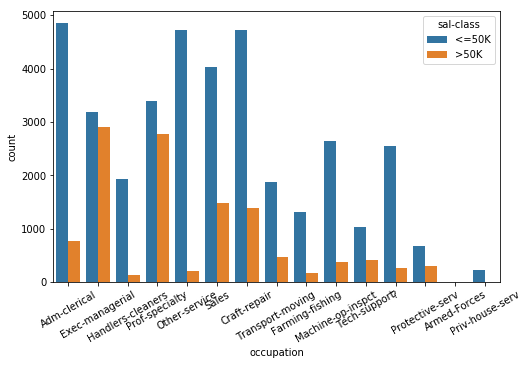

In [16]:
plt.figure(figsize = (8, 5))
g = sns.countplot(adult_df_raw['occupation'], hue = adult_df_raw['sal-class'], orient = "v")
g.set_xticklabels(adult_df_raw['occupation'].unique(), rotation = 30)

##### Occupation Analysis:
Fom the above plot, it is evident that the Exec managers and Prof-speciality occupations ae earning better salaries compared to other occupations. Majority of the people in other professions are earning lesser salaries

[Text(0, 0, 'Not-in-family'),
 Text(0, 0, 'Husband'),
 Text(0, 0, 'Wife'),
 Text(0, 0, 'Own-child'),
 Text(0, 0, 'Unmarried'),
 Text(0, 0, 'Other-relative')]

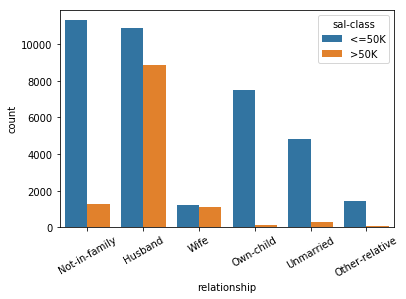

In [17]:
g = sns.countplot(adult_df_raw['relationship'], hue = adult_df_raw['sal-class'], orient = "v")
g.set_xticklabels(adult_df_raw['relationship'].unique(), rotation = 30)

##### Relationship Analysis:
Fom the above plot, it is evident that almost equal number of people with relationship Husband and Wife are earning salaries >50K where as all other relationships predominantly earning salaries less than 50K

[Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Asian-Pac-Islander'),
 Text(0, 0, 'Amer-Indian-Eskimo'),
 Text(0, 0, 'Other')]

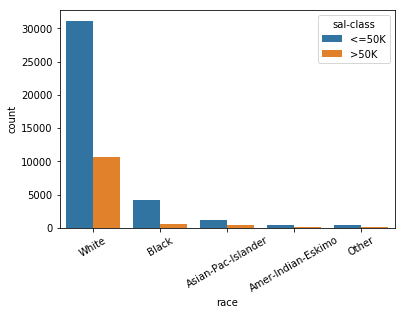

In [18]:
g = sns.countplot(adult_df_raw['race'], hue = adult_df_raw['sal-class'], orient = "v")
g.set_xticklabels(adult_df_raw['race'].unique(), rotation = 30)

##### Race Analysis:
Fom the above plot, it is evident that good number of Whites are earning salaries more than 50K. In other groups more people are earning less than 50K. It also tells us tha predominantly whites compared to other races

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

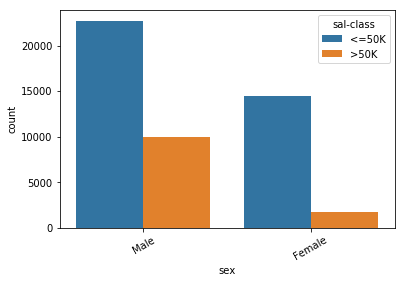

In [19]:
g = sns.countplot(adult_df_raw['sex'], hue = adult_df_raw['sal-class'], orient = "v")
g.set_xticklabels(adult_df_raw['sex'].unique(), rotation = 30)

##### Gender Analysis:
Fom the above plot, it is evident that good number of males are earning more than 50K compared to females. And in theoverall population the males are more in numbers than females.

[Text(0, 0, 'United-States'),
 Text(0, 0, 'Cuba'),
 Text(0, 0, 'Jamaica'),
 Text(0, 0, 'India'),
 Text(0, 0, '?'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'South'),
 Text(0, 0, 'Puerto-Rico'),
 Text(0, 0, 'Honduras'),
 Text(0, 0, 'England'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Columbia'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 'Ecuador'),
 Text(0, 0, 'Laos'),
 Text(0, 0, 'Taiwan'),
 Text(0, 0, 'Haiti'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Dominican-Republic'),
 Text(0, 0, 'El-Salvador'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Guatemala'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Yugoslavia'),
 Text(0, 0, 'Peru'),
 Text(0, 0, 'Outlying-US(Guam-USVI-etc)'),
 Text(0, 0, 'Scotland'),
 Text(0, 0, 'Trinadad&Tobago'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Nicaragua'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'Hong'),
 Text(0, 0, 'Ireland'),
 Text(0, 0

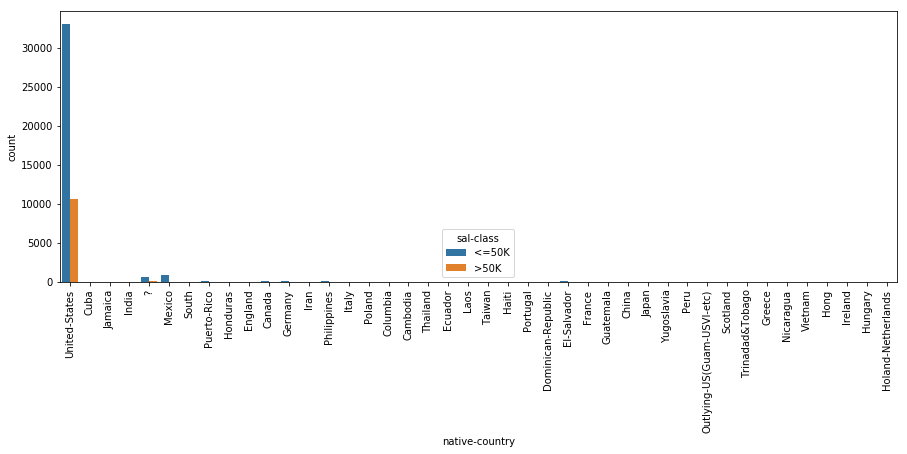

In [20]:
plt.figure(figsize = (15, 5))
g = sns.countplot(adult_df_raw['native-country'], hue = adult_df_raw['sal-class'], orient = "v")
g.set_xticklabels(adult_df_raw['native-country'].unique(), rotation = 90)

##### Native Country Analysis:
This shows the population is mostly from US with very few from other countries. The percentage of people with >50K is mostly in US

##### Using describe function and Hist plots
From thebelow output and the hist plots - Age seems to be normally distributed with slightly right skew. Hours per week seems to right skewed. fnlwgt also more or less normally destributed with right skew. So overall the data distribution looks good.

In [21]:
adult_df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


##### Lets look at the hist plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5F5997470>,
      dtype=object)

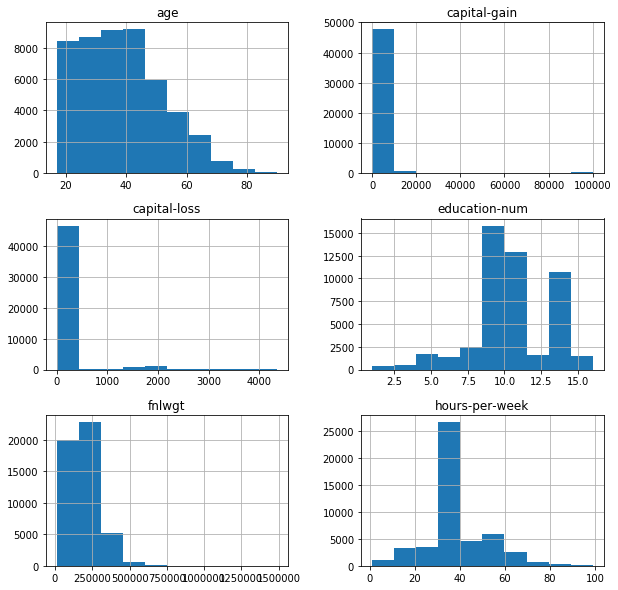

In [22]:
adult_df_raw.hist(figsize = (10,10))

##### Data Cleaning
Delete rows with ? marks in the dataframe for attributes work-class, occupation and native country.
As these are categorical variables, it will not make much sense to replace the with mode.
There is a chance that it will produce bias and distort the pattern in the original data set.
Its also noted that the total number of rows deleted is less than 8% in a dataset of approximately 49K rows.
So I think removing the rows is a better option here. I am open for sharing my thought process

In [23]:
df1 = adult_df[adult_df['work-class'] != '?']
df2 = df1[df1['occupation'] != '?']
df3 = df2[df2['native-country'] != '?']
#adult_df = adult_df[a].append(adult_df[b])
adult_df = df3.copy()
adult_df_bkp2 = df3.copy()
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
work-class        45222 non-null object
fnlwgt            45222 non-null int64
education         45222 non-null object
education-num     45222 non-null int64
marital-status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital-gain      45222 non-null int64
capital-loss      45222 non-null int64
hours-per-week    45222 non-null int64
native-country    45222 non-null object
sal-class         45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


##### Convert the object data type to category for all the columns which are of type object
As the models will not work on the categorical variables, let's convert the attributes to numerical. The below piece of code gives us the dataset with all numerical values.

In [25]:
# Loop through the data frame colums and change the attributes where the data type is of object
for col in adult_df.columns:
    if adult_df[col].dtype == 'object':
        adult_df[col] = pd.Categorical(adult_df[col]).codes

adult_df.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal-class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [26]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
work-class        45222 non-null int8
fnlwgt            45222 non-null int64
education         45222 non-null int8
education-num     45222 non-null int64
marital-status    45222 non-null int8
occupation        45222 non-null int8
relationship      45222 non-null int8
race              45222 non-null int8
sex               45222 non-null int8
capital-gain      45222 non-null int64
capital-loss      45222 non-null int64
hours-per-week    45222 non-null int64
native-country    45222 non-null int8
sal-class         45222 non-null int8
dtypes: int64(6), int8(9)
memory usage: 2.8 MB


##### Missing Values
After appendng the two data frames, run the DataFrame.info command. From the output of df.info(), it is understood that there are no missing values as it shows all are non-null
Also verifiedthat the total number of rows are equal to sum of the rows on thetwo data sets

Even though there are no missing values. However from the value_counts() function it's understood that we have question marks in multiple colums like country, occupation, work-class etc

###### From the below isnull command we understad that there are no null vaues in the data set

In [27]:
adult_df.isnull().sum()

age               0
work-class        0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
sal-class         0
dtype: int64

##### Pairplot Analysis
From the below pair plots almost all the attributes in the data is more or less independent of each other. Noneof the graphs show any relationship. There are two two columns education and education number. Both are same. One is categorical ad the other one is numeric representation. So the education column can be dropped keeping education-num

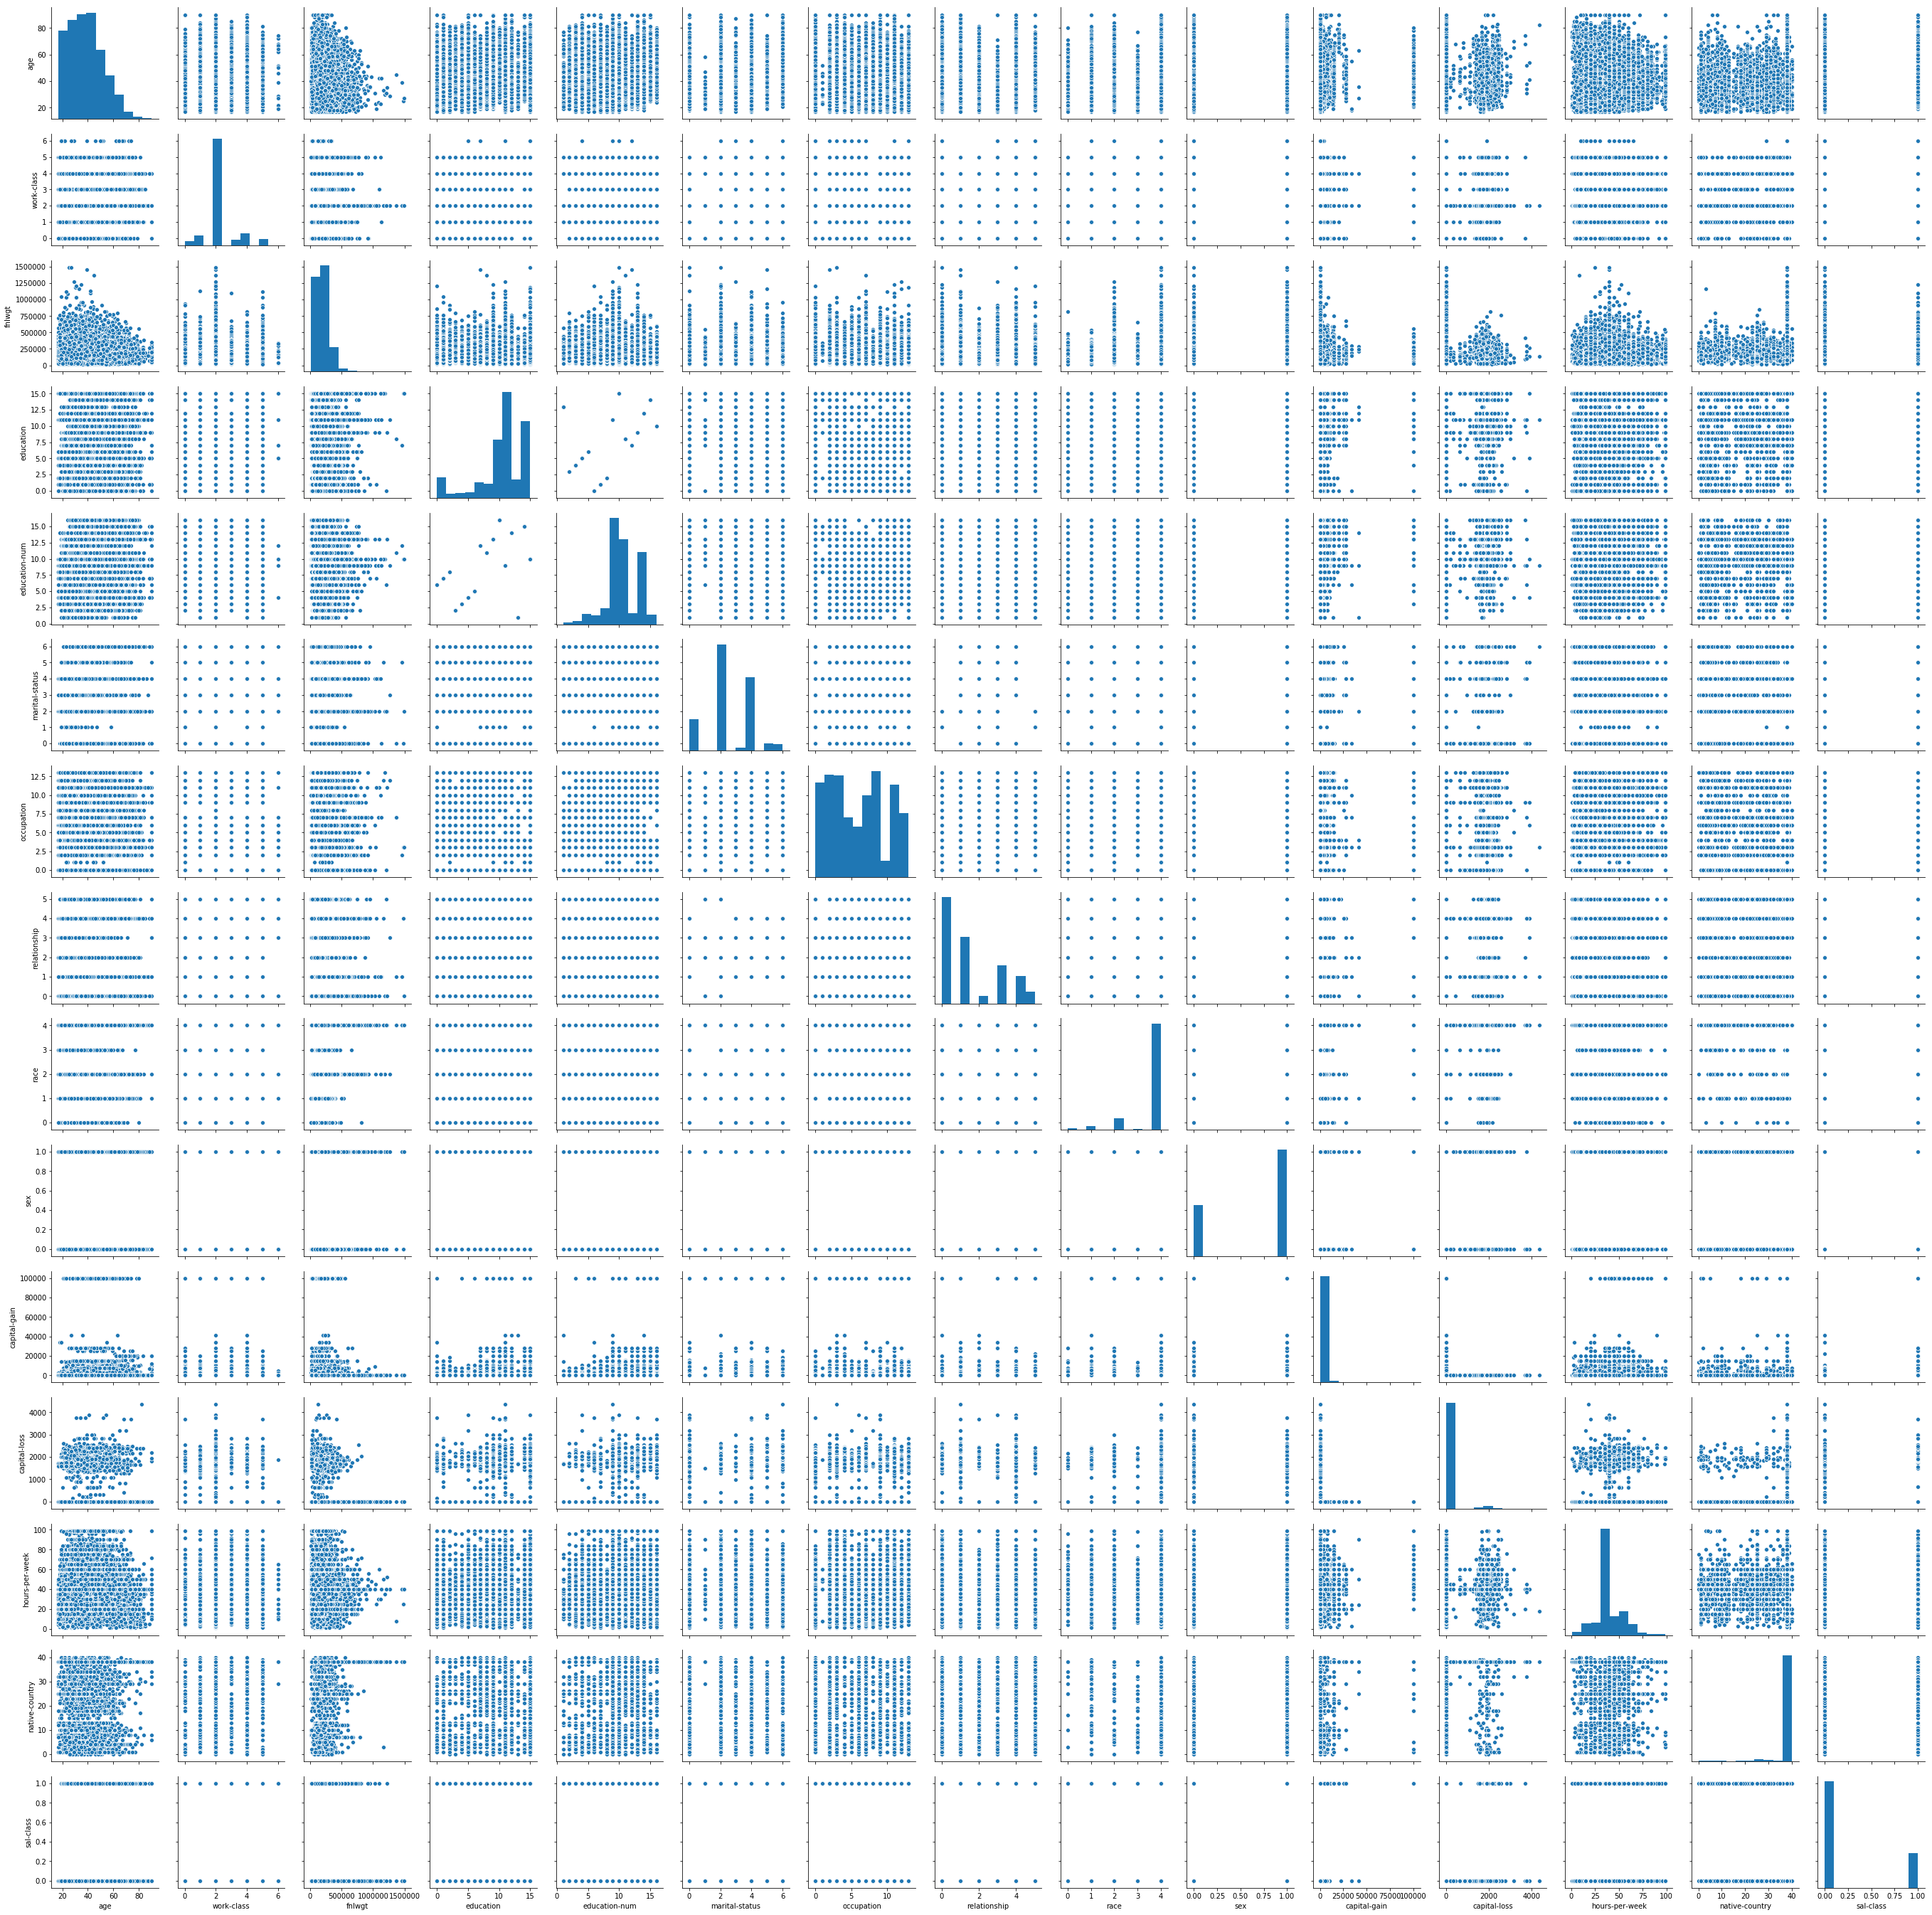

In [28]:
sns.pairplot(adult_df)

##### Lets look at the correlation

In [29]:
corr = adult_df.corr()
corr
# From the below out put, it is evident that the correlation among the independent variabes is very weak.
# So we can safely assume that they are truely independent. This is also evident from the heat map.

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,sal-class
age,1.000000,0.085892,-0.075792,-0.003511,0.037623,-0.271623,-0.004474,-0.247564,0.023776,0.082053,0.079683,0.059351,0.101992,-0.003180,0.237040
work-class,0.085892,1.000000,-0.034970,0.017846,0.040779,-0.033221,0.017508,-0.065049,0.049765,0.069638,0.034543,0.008233,0.051366,0.003889,0.015659
fnlwgt,-0.075792,-0.034970,1.000000,-0.025318,-0.041993,0.033096,-0.002036,0.009909,-0.029188,0.027240,-0.004110,-0.004349,-0.018679,-0.061098,-0.007264
education,-0.003511,0.017846,-0.025318,1.000000,0.347444,-0.041520,-0.033499,-0.013179,0.011457,-0.027569,0.029889,0.016877,0.060887,0.077893,0.081196
education-num,0.037623,0.040779,-0.041993,0.347444,1.000000,-0.064986,0.089686,-0.088431,0.031655,0.003417,0.126907,0.081711,0.146206,0.092994,0.332800
marital-status,-0.271623,-0.033221,0.033096,-0.041520,-0.064986,1.000000,0.016399,0.180436,-0.070302,-0.120008,-0.042399,-0.034820,-0.183178,-0.022721,-0.192711
occupation,-0.004474,0.017508,-0.002036,-0.033499,0.089686,0.016399,1.000000,-0.051644,-0.000026,0.056625,0.019435,0.015267,0.016160,-0.002848,0.049787
relationship,-0.247564,-0.065049,0.009909,-0.013179,-0.088431,0.180436,-0.051644,1.000000,-0.118584,-0.582974,-0.056818,-0.058425,-0.259194,-0.007144,-0.253402
race,0.023776,0.049765,-0.029188,0.011457,0.031655,-0.070302,-0.000026,-0.118584,1.000000,0.088935,0.014078,0.020955,0.044738,0.124342,0.070844
sex,0.082053,0.069638,0.027240,-0.027569,0.003417,-0.120008,0.056625,-0.582974,0.088935,1.000000,0.047444,0.046457,0.231425,-0.004170,0.215760


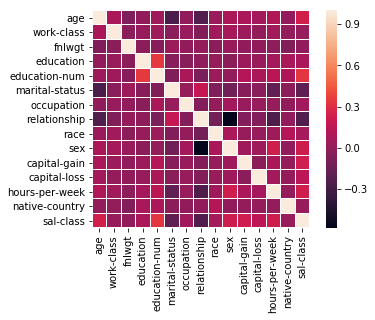

In [30]:
sns.heatmap(corr,linewidths = 0.2,square = True)